In [32]:
import cantera as ct
import numpy as np
import csv

# %config InlineBackend.figure_formats = ["svg"]
%matplotlib inline
import matplotlib.pylab as plt

print('running cantera version: ' + ct.__version__)

running cantera version: 3.0.0


In [33]:
gas = ct.Solution("data/chem.yaml")

C:\Users\tahze\AppData\Local\Temp\ipykernel_33532\292288002.py:1: UserWarning: NasaPoly2::validate: 
For species H2, discontinuity in cp/R detected at Tmid = 2.01
	Value computed using low-temperature polynomial:  2.3602934365979036
	Value computed using high-temperature polynomial: 2.9345266806587236

  gas = ct.Solution("data/chem.yaml")
C:\Users\tahze\AppData\Local\Temp\ipykernel_33532\292288002.py:1: UserWarning: NasaPoly2::validate: 
For species H2, discontinuity in h/RT detected at Tmid = 2.01
	Value computed using low-temperature polynomial:  -454.33184031861595
	Value computed using high-temperature polynomial: -401.57655092980355

  gas = ct.Solution("data/chem.yaml")
C:\Users\tahze\AppData\Local\Temp\ipykernel_33532\292288002.py:1: UserWarning: NasaPoly2::validate: 
For species H2, discontinuity in s/R detected at Tmid = 2.01
	Value computed using low-temperature polynomial:  2.335670747304918
	Value computed using high-temperature polynomial: 1.024867759488491

  gas = ct.So

In [34]:
gas.TPX = 700, ct.one_atm, 'NH3: 1, HCLO4: 1'
gas()


  gas:

       temperature   700 K
          pressure   1.0132e+05 Pa
           density   1.0227 kg/m^3
  mean mol. weight   58.743 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy             61135        3.5912e+06  J
   internal energy            -37944       -2.2289e+06  J
           entropy            4570.1        2.6846e+05  J/K
    Gibbs function        -3.138e+06       -1.8433e+08  J
 heat capacity c_p            864.51             50784  J/K
 heat capacity c_v            722.97             42469  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
               NH3           0.14496               0.5           -33.087
             HCLO4           0.85504               0.5           -30.256
     [  +34 minor]                 0                 0  



C:\Users\tahze\AppData\Local\Temp\ipykernel_33532\1729678164.py:6: UserWarning: NasaPoly2::validate: 
For species H2, discontinuity in cp/R detected at Tmid = 2.01
	Value computed using low-temperature polynomial:  2.3602934365979036
	Value computed using high-temperature polynomial: 2.9345266806587236

  gas = ct.Solution('data/chem.yaml')
C:\Users\tahze\AppData\Local\Temp\ipykernel_33532\1729678164.py:6: UserWarning: NasaPoly2::validate: 
For species H2, discontinuity in h/RT detected at Tmid = 2.01
	Value computed using low-temperature polynomial:  -454.33184031861595
	Value computed using high-temperature polynomial: -401.57655092980355

  gas = ct.Solution('data/chem.yaml')
C:\Users\tahze\AppData\Local\Temp\ipykernel_33532\1729678164.py:6: UserWarning: NasaPoly2::validate: 
For species H2, discontinuity in s/R detected at Tmid = 2.01
	Value computed using low-temperature polynomial:  2.335670747304918
	Value computed using high-temperature polynomial: 1.024867759488491

  gas = ct

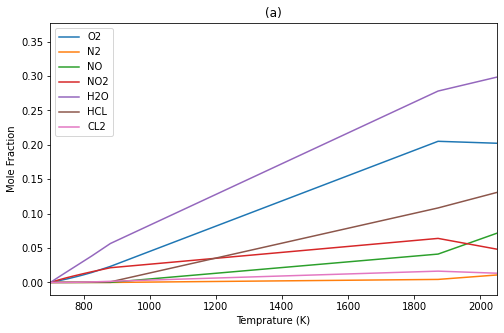

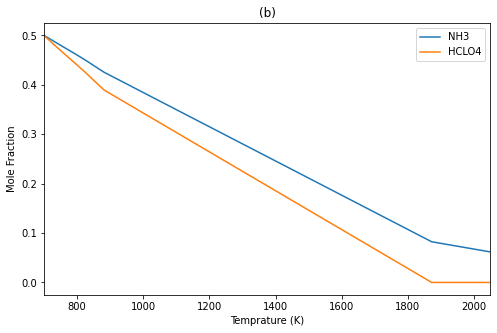

In [60]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

# Create a gas object for NH3 and HClO4
gas = ct.Solution('data/chem.yaml')
gas.TPX = 700, ct.one_atm, 'NH3:1, HClO4:1'

# Create a reactor using the gas
r = ct.IdealGasConstPressureReactor(gas)

# Create a reactor network
sim = ct.ReactorNet([r])

# Set the time step
time_step = 1e-5  # seconds

# Initialize arrays to store the time and temperature
time = []
temp = []

# Initialize a dictionary to store the mole fractions for each species
X = {name: [] for name in gas.species_names}

# Run the simulation for a certain number of steps
for n in range(10000):
    time.append(sim.time)
    temp.append(gas.T)
    for name in gas.species_names:
        X[name].append(gas[name].X)
    sim.advance(sim.time + time_step)

# Convert lists to numpy arrays for easier manipulation
time = np.array(time)
temp = np.array(temp)
for name in gas.species_names:
    X[name] = np.array(X[name])

plt.figure(figsize=(8, 5))

# Plot mole fractions of O2, NO, and NO2 vs. time
for name in ['O2', 'N2', 'NO', 'NO2', 'H2O', 'HCL', 'CL2']:
    plt.plot(temp, X[name], label=name)
    plt.title('(a)')
    plt.xlabel('Temprature (K)')
    plt.ylabel('Mole Fraction')
    plt.legend()
    plt.xlim(700, 2050)

plt.show()
plt.figure(figsize=(8, 5))

for name in ['NH3', 'HCLO4']:
    plt.plot(temp, X[name], label=name)
    plt.title('(b)')
    plt.xlabel('Temprature (K)')
    plt.ylabel('Mole Fraction')
    plt.legend()
    plt.xlim(700, 2050)

plt.show()
# Limit the x-axis (temperature) from 700 to 1200 K

In [41]:
print(temp)

[ 700.          701.00608415  702.62485531 ... 2610.75064267 2610.75064268
 2610.75064269]
